In [1]:
import geopandas as gpd
from shapely.geometry import point
import matplotlib.pylab as plt
%pylab inline
import shapely

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [35]:
census = gpd.read_file('2010-Census-Tracts/geo_export_9cc38e45-3e88-4394-885b-63ade4e18c7d.shp')

In [36]:
census.head()

,boro_code,boro_ct_20,boro_name,cdeligibil,ct_2010,ctlabel,geometry,ntacode,ntaname,puma,shape_area,shape_leng
0,5,5000900,Staten Island,I,000900,9,POLYGON ((-74.07920577013245 40.64343078374567...,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794
1,5,5007400,Staten Island,I,007400,74,POLYGON ((-74.05974734759452 40.59384861156722...,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,5.788238e+06,9902.948473
2,1,1003200,Manhattan,I,003200,32,POLYGON ((-73.97990650235904 40.72686577300234...,MN22,East Village,3809,2.334190e+06,6358.386684
3,1,1009800,Manhattan,I,009800,98,POLYGON ((-73.96432543478758 40.75638153099091...,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811
4,1,1010000,Manhattan,I,010000,100,POLYGON ((-73.96802436915851 40.75957814005282...,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,5692.168737


In [37]:
census.crs = {'init' :'epsg:4326'}

In [40]:
census = census[census['boro_name'] == 'Brooklyn']

In [41]:
census.head()

,boro_code,boro_ct_20,boro_name,cdeligibil,ct_2010,ctlabel,geometry,ntacode,ntaname,puma,shape_area,shape_leng
29,3,3000501,Brooklyn,I,000501,5.01,"POLYGON ((-73.99301822153384 40.6974623645668,...",BK09,Brooklyn Heights-Cobble Hill,4004,9.015070e+05,4828.170042
30,3,3002000,Brooklyn,E,002000,20,POLYGON ((-74.01266264860631 40.64925555478156...,BK32,Sunset Park West,4012,1.620770e+06,5426.067279
31,3,3004100,Brooklyn,I,004100,41,POLYGON ((-73.98181677448231 40.68732980276495...,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,4004,1.744094e+06,5283.856660
32,3,3005201,Brooklyn,E,005201,52.01,"POLYGON ((-74.0346006153585 40.62200073904816,...",BK31,Bay Ridge,4013,1.448244e+06,5520.047898
33,3,3005202,Brooklyn,I,005202,52.02,POLYGON ((-74.03543728497804 40.61995580764228...,BK31,Bay Ridge,4013,1.398134e+06,5190.713908


In [42]:
print(len(census))

760


In [43]:
cusp = (-73.986403, 40.693217)
cusp = shapely.geometry.Point(cusp)

In [44]:
print(type(cusp))

<class 'shapely.geometry.point.Point'>


In [45]:
census = census.set_geometry('geometry')

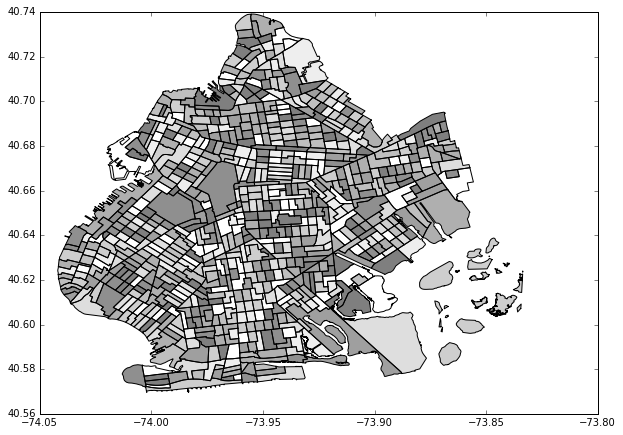

In [47]:
census.plot(colormap='gray', figsize=(10,10))

In [11]:
boolcol = []
for row in census.geometry:
    boolcol.append(shapely.geometry.asShape(row).contains(cusp))
# - save the index of the polygon that contains the CUSP

In [12]:
census['Bool'] = boolcol

In [13]:
census.loc[census['Bool'] == True]

,boro_code,boro_ct_20,boro_name,cdeligibil,ct_2010,ctlabel,geometry,ntacode,ntaname,puma,shape_area,shape_leng,Bool
714,3,3001100,Brooklyn,I,001100,11,"POLYGON ((-73.9851430608965 40.69488514296982,...",BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,4004,1.814052e+06,5760.471688,True


In [22]:
cusppoly = census.loc[census['Bool'] == True]

In [59]:
tenth = census.iloc[::5, :]

In [60]:
print(len(tenth))

152


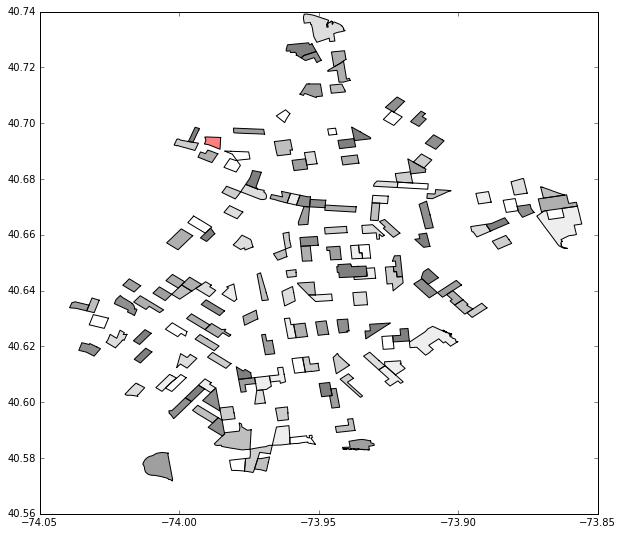

In [68]:
ax = tenth.plot(figsize=(10,10), colormap='gray')
cusppoly.plot(ax=ax, colormap='bwr')